In [3]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("loan_clean.csv")
df = df.sample(frac = 0.1)
y = df['default']
y.value_counts()
dummy = df.columns.tolist()
dummy.remove('default')
X = pd.get_dummies(df[dummy],dtype='int')


************    Please enter the values of the following paramters or press newline for using default values    ************



Probability of crossover [0-1] (default=0.7):  0.8
Probability of mutation [0-1] (default=0.3):  0.1
Max crossover in every Generation [5-10] (default=5):  10
Percentage of data for valdiation [0-100] (default=30):  30
Weight for the classification accuracy [0-1] (default=0.9):  0.9



*****************************************************    Thank You    ******************************************************


                          Iteration - 1

Crossover-Mutation phase starting....

Crossover no. 1
child 1 replaced with chromosome having id 30

Crossover no. 2
child 1 replaced with chromosome having id 30
child 2 replaced with chromosome having id 29

Crossover no. 3
child 1 replaced with chromosome having id 29
child 2 replaced with chromosome having id 28

Crossover no. 4
child 1 replaced with chromosome having id 28
child 2 replaced with chromosome having id 27

Crossover no. 5
child 1 replaced with chromosome having id 30
child 2 replaced with chromosome having id 29

Crossover no. 6
child 1 replaced with chromosome having id 29
child 2 replaced with chromosome having id 28

Crossover no. 7
child 1 replaced with chromosome having id 27
child 2 replaced with chromosome having id 26

Crossover no. 8
child 1 replaced with chromosome having id 26

Crossover no

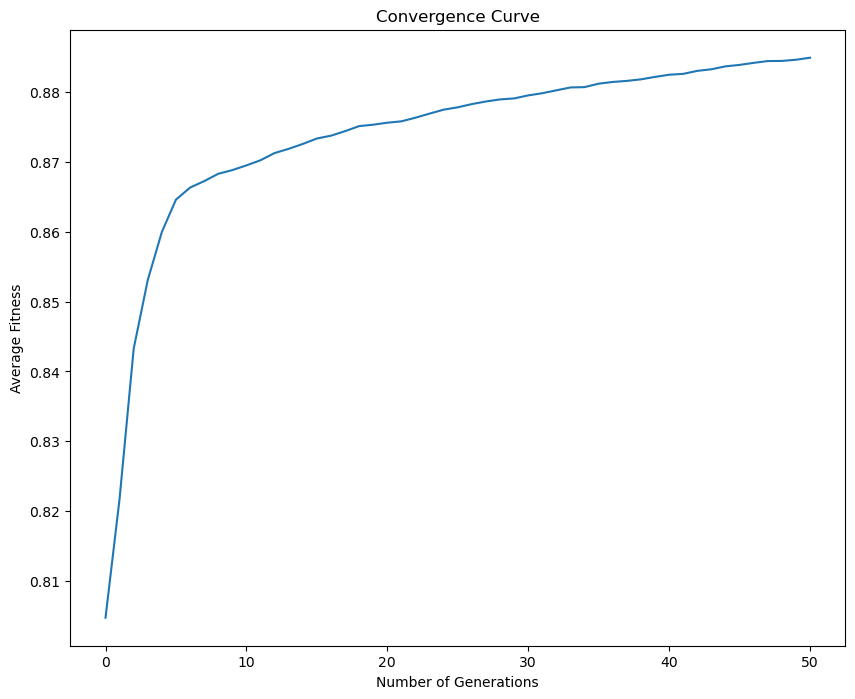


------------- Leader Agent ---------------
Fitness: 0.8904526402692662
Number of Features: 17
----------------------------------------



In [4]:
from Py_FS.wrapper.population_based.GA import GA as FS
algo = FS(num_agents=30, max_iter=50, train_data=X, train_label=y, save_conv_graph=True)
results = algo.run()

In [5]:
a = results.solution.best_agent

In [6]:
best_features_names = X.columns[a.astype(bool)]

In [7]:
best_features_names

Index(['avg_cur_bal', 'last_fico_range_high', 'last_fico_range_low',
       'loan_amnt', 'pub_rec_bankruptcies', 'term', 'year', 'num_actv_rev_tl',
       'num_bc_tl', 'mths_since_recent_bc', 'application_type_Individual',
       'grade_C', 'initial_list_status_f', 'purpose_credit_card',
       'purpose_educational', 'purpose_moving', 'purpose_renewable_energy'],
      dtype='object')

In [11]:
best_features_names=['avg_cur_bal', 'last_fico_range_high', 'last_fico_range_low',
       'loan_amnt', 'pub_rec_bankruptcies', 'term', 'year', 'num_actv_rev_tl',
       'num_bc_tl', 'mths_since_recent_bc', 'application_type_Individual',
       'grade_C', 'initial_list_status_f', 'purpose_credit_card',
       'purpose_educational', 'purpose_moving', 'purpose_renewable_energy']

In [8]:
len(best_features_names)

17

In [9]:
results.solution.best_accuracy

0.9028117359413202

In [5]:
df = pd.read_csv("loan_clean.csv")
y = df['default']
y.value_counts()
dummy = df.columns.tolist()
dummy.remove('default')
X = pd.get_dummies(df[dummy],dtype='int')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=11, stratify=y)

NameError: name 'train_test_split' is not defined

accuracy: 0.74(+- 0.04)
accuracy: 0.83(+- 0.03)


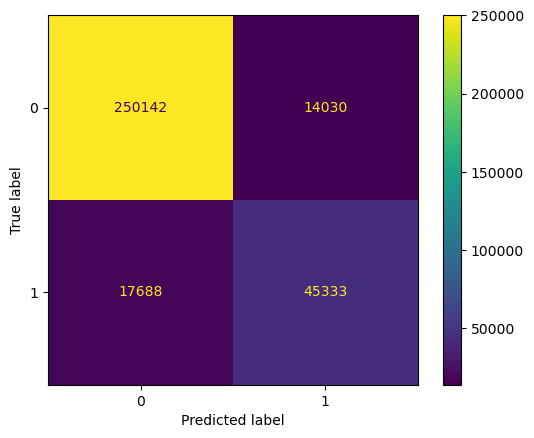

In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
## print f1 score
n_scores=cross_val_score(neigh,X[best_features_names],y,cv=5,scoring="f1")
balanced_accuracy_score=cross_val_score(neigh,X[best_features_names],y,cv=5,scoring="balanced_accuracy")
# print(balanced_accuracy_score)
# print(n_scores)
print("accuracy: %0.2f(+- %0.2f)"%(n_scores.mean(),n_scores.std()))
print("accuracy: %0.2f(+- %0.2f)"%(balanced_accuracy_score.mean(),balanced_accuracy_score.std()))
neigh.fit(x_train[best_features_names],y_train)
## draw confusion matrix
y_pred=neigh.predict(x_test[best_features_names])
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy: 0.76(+- 0.02)
accuracy: 0.88(+- 0.02)


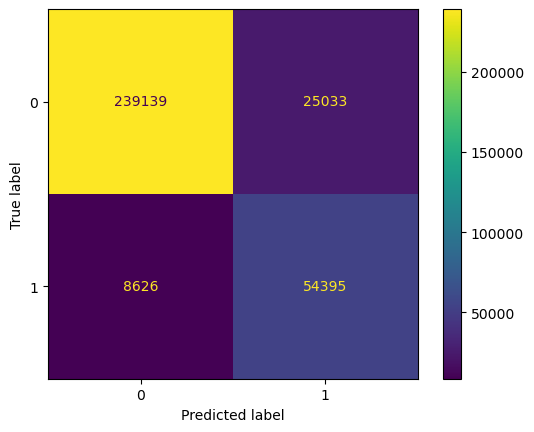

In [13]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=500,learning_rate= 0.0001)

## print f1 score
n_scores=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="f1")
balanced_accuracy_score=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="balanced_accuracy")
# print(balanced_accuracy_score)
# print(n_scores)
print("accuracy: %0.2f(+- %0.2f)"%(n_scores.mean(),n_scores.std()))
print("accuracy: %0.2f(+- %0.2f)"%(balanced_accuracy_score.mean(),balanced_accuracy_score.std()))
ada.fit(x_train[best_features_names],y_train)
## draw confusion matrix
y_pred=ada.predict(x_test[best_features_names])
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

accuracy: 0.77(+- 0.03)
accuracy: 0.87(+- 0.02)


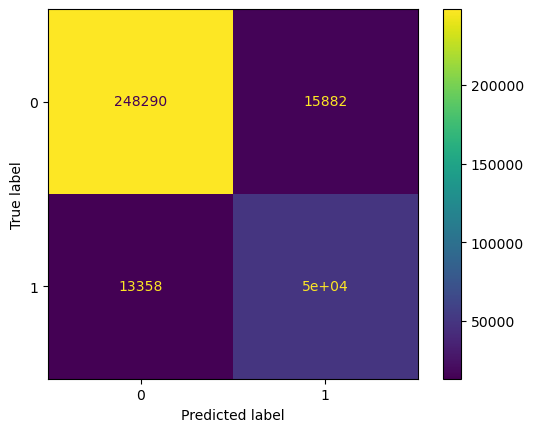

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
ada = RandomForestClassifier(max_depth=5)


## print f1 score
n_scores=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="f1")
balanced_accuracy_score=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="balanced_accuracy")
# print(balanced_accuracy_score)
# print(n_scores)
print("accuracy: %0.2f(+- %0.2f)"%(n_scores.mean(),n_scores.std()))
print("accuracy: %0.2f(+- %0.2f)"%(balanced_accuracy_score.mean(),balanced_accuracy_score.std()))
ada.fit(x_train[best_features_names],y_train)
## draw confusion matrix
y_pred=ada.predict(x_test[best_features_names])
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy: 0.77(+- 0.04)
accuracy: 0.85(+- 0.04)


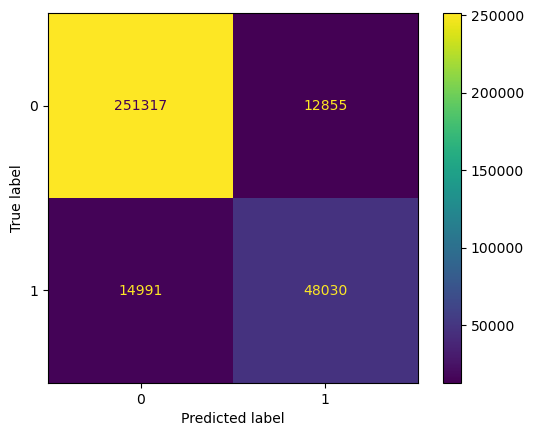

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
ada = MLPClassifier()


## print f1 score
n_scores=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="f1")
balanced_accuracy_score=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="balanced_accuracy")
# print(balanced_accuracy_score)
# print(n_scores)
print("accuracy: %0.2f(+- %0.2f)"%(n_scores.mean(),n_scores.std()))
print("accuracy: %0.2f(+- %0.2f)"%(balanced_accuracy_score.mean(),balanced_accuracy_score.std()))
ada.fit(x_train[best_features_names],y_train)
## draw confusion matrix
y_pred=ada.predict(x_test[best_features_names])
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

C:\Users\raona\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\raona\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\raona\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\raona\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\raona\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\raona\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\raona\anaconda3\Lib\site-

accuracy: 0.32(+- 0.08)
accuracy: 0.54(+- 0.06)


C:\Users\raona\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


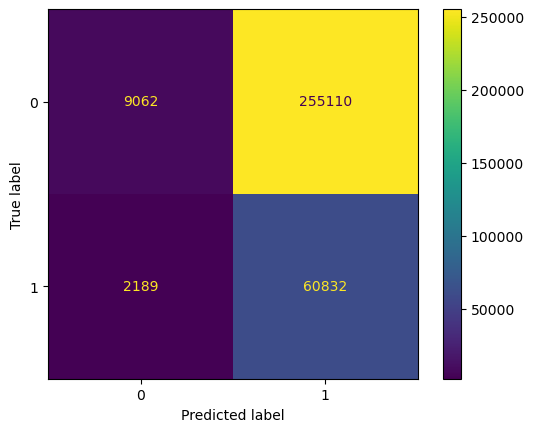

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
ada = QuadraticDiscriminantAnalysis()


## print f1 score
n_scores=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="f1")
balanced_accuracy_score=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="balanced_accuracy")
# print(balanced_accuracy_score)
# print(n_scores)
print("accuracy: %0.2f(+- %0.2f)"%(n_scores.mean(),n_scores.std()))
print("accuracy: %0.2f(+- %0.2f)"%(balanced_accuracy_score.mean(),balanced_accuracy_score.std()))
ada.fit(x_train[best_features_names],y_train)
## draw confusion matrix
y_pred=ada.predict(x_test[best_features_names])
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

accuracy: 0.76(+- 0.03)
accuracy: 0.85(+- 0.02)


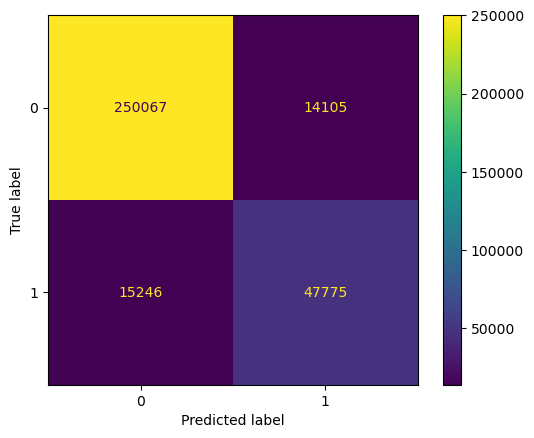

In [14]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
ada = SGDClassifier(max_iter=1000, tol=1e-3)


## print f1 score
n_scores=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="f1")
balanced_accuracy_score=cross_val_score(ada,X[best_features_names],y,cv=5,scoring="balanced_accuracy")
# print(balanced_accuracy_score)
# print(n_scores)
print("accuracy: %0.2f(+- %0.2f)"%(n_scores.mean(),n_scores.std()))
print("accuracy: %0.2f(+- %0.2f)"%(balanced_accuracy_score.mean(),balanced_accuracy_score.std()))
ada.fit(x_train[best_features_names],y_train)
## draw confusion matrix
y_pred=ada.predict(x_test[best_features_names])
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()